In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


In [37]:
df = pd.read_csv("data\heart.csv")

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\hp\AppData\Local\Temp\ipykernel_16504\2583708689.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv("data\heart.csv")


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
num_cols = df.select_dtypes(include="int64").columns.to_list()
print("Numerical Cols: ", num_cols)

cat_cols = df.select_dtypes(include="object").columns.to_list()
print("\nCatagorical Cols: ", cat_cols)

Numerical Cols:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']

Catagorical Cols:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [41]:
df.describe(include=["O"]).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


**Attributes Used**

 - `Age`: age of the patient [years] 
 - `Sex`: sex of the patient [M: Male, F: Female]
 - `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
 - `RestingBP`: resting blood pressure [mm Hg]
 - `Cholesterol`: serum cholesterol [mm/dl]
 - `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 - `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
 - `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
 - `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
 - `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
 - `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**Target**

 - `HeartDisease`: output class [1: heart disease, 0: Normal]

#### Missing Values Analysis

In [42]:
missing_values = df.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 1. Our dataset doesn't contain missing values.
  
**If our dataset had missing values, we could do the following -**
 **Handling Missing Data:**
   - **Significant Missing Values**: Columns might have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, if they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Columns having moderate missing values will require careful handling. Missing values could be filled with "No ChestPainType" or "No ExerciseAngina" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.


### 2. Summary Statistics

**Numerical Columns**

| Feature          | Key Insights                                                                                                             |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Age**          | Mean age ≈ **53.5 years**; min 28, max 77 → mostly middle-aged adults.                                                   |
| **RestingBP**    | Mean ≈ **132 mmHg**, but **min = 0** → 0 is **invalid** (BP can’t be 0). Probably a data entry error.                    |
| **Cholesterol**  | Mean ≈ **199 mg/dL**, range 0–603. Again, **0 is unrealistic** for cholesterol → treat as **missing/anomalous**.         |
| **FastingBS**    | Binary (0 or 1); mean ≈ 0.23 → ~23% of people have fasting blood sugar > 120 mg/dL.                                      |
| **MaxHR**        | Mean ≈ **136 bpm**, range 60–202 → fairly wide spread, some outliers on the high side.                                   |
| **Oldpeak**      | Mean ≈ 0.89, can go negative (min = -2.6) — possibly due to measurement or scaling. Negative values might need checking. |
| **HeartDisease** | Binary (0 or 1); mean ≈ 0.55 → ~55% of participants have heart disease.                                                  |

**Categorical Columns**

| Feature            | Insights                                                                                                 |
| ------------------ | -------------------------------------------------------------------------------------------------------- |
| **Sex**            | 918 entries, **M = 725**, F = 193 → dataset is **male-dominated (~79%)**.                                |
| **ChestPainType**  | 4 types, most common = **ASY (Asymptomatic)** → suggests many patients didn’t show visible symptoms.     |
| **RestingECG**     | 3 types, most common = **Normal (552)** → majority had normal resting ECGs.                              |
| **ExerciseAngina** | Binary; **N = 547**, so ~60% had **no angina** induced by exercise.                                      |
| **ST_Slope**       | 3 categories, **Flat** is the most common (460) → may indicate ST depression, relevant to heart disease. |



In [43]:
print("Number of people with Resting Blood Pressure <= 60:", (df["RestingBP"]<=60).sum())
print("Number of people with Cholesterol <= 50:", (df["Cholesterol"] <= 50).sum())

Number of people with Resting Blood Pressure <= 60: 1
Number of people with Cholesterol <= 50: 172


**Univariate Analysis**

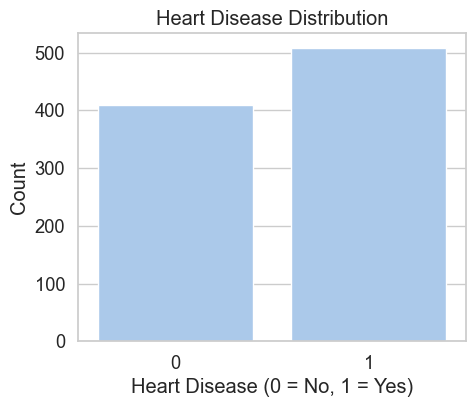

In [44]:
# Distribution of Target
plt.figure(figsize=(5,4))
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Shows class balance — here, about 55% positive cases.

**Bivariate Analysis**

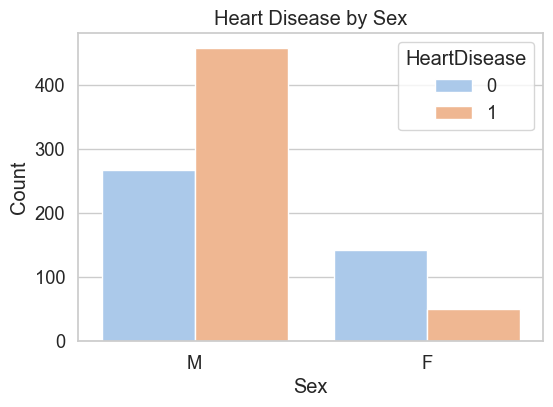

In [45]:
# Sex vs heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


Reveals if males/females differ in heart disease prevalence.

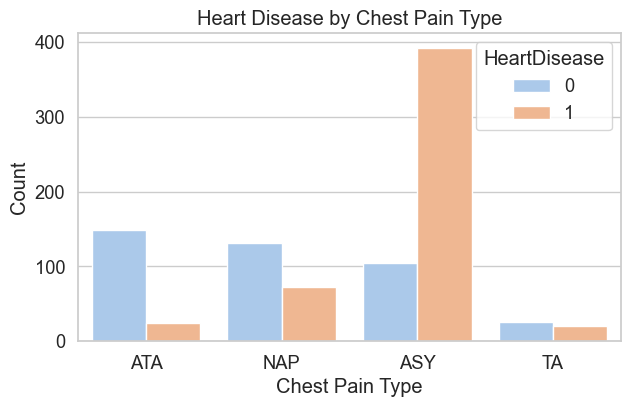

In [46]:
# Chest Pain Type vs Heart Disease
plt.figure(figsize=(7,4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


Typically, ASY (asymptomatic) tends to correlate with more heart disease.

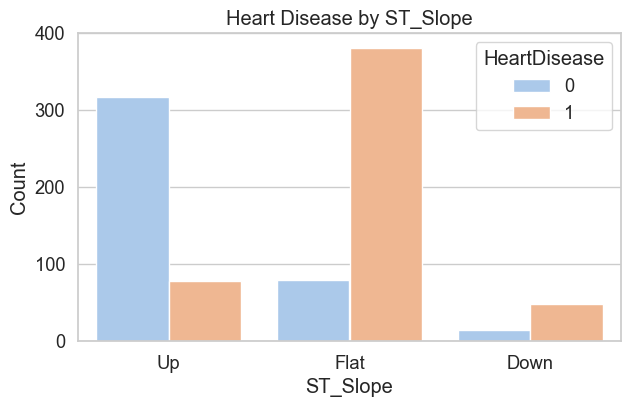

In [47]:
# ST Slope vs Heart Disease
plt.figure(figsize=(7,4))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title("Heart Disease by ST_Slope")
plt.xlabel("ST_Slope")
plt.ylabel("Count")
plt.show()

**Flat slope is dominant among heart disease patients; Upsloping more common in non-disease group.**

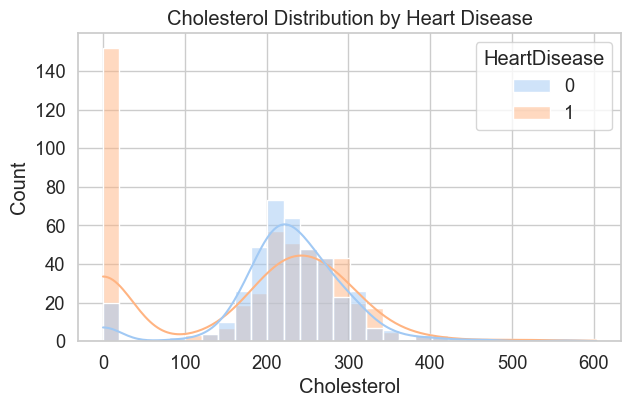

In [48]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', bins=30, kde=True)
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()

**Higher cholesterol levels in heart disease cases.**

### Summary
Dataset captures classic cardiovascular risk patterns:
 - Middle-aged males dominate.
 - High cholesterol and BP are common but not the only drivers.
 - ASY chest pain, flat ST slope, exercise angina, high oldpeak, and lower MaxHR are strong predictors.

Some data quality issues (0 values) should be fixed before modeling.

Data is slightly imbalanced, but manageable for classification tasks (≈55:45).

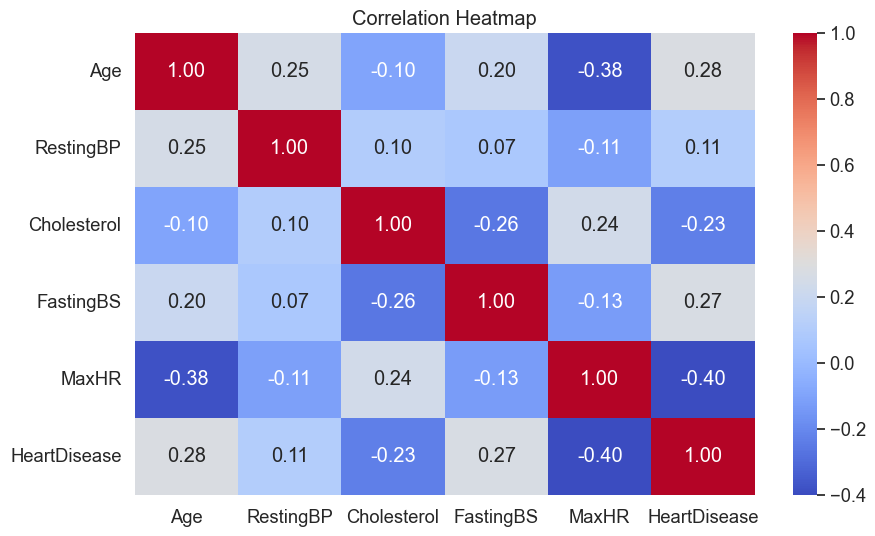

In [49]:
# Correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


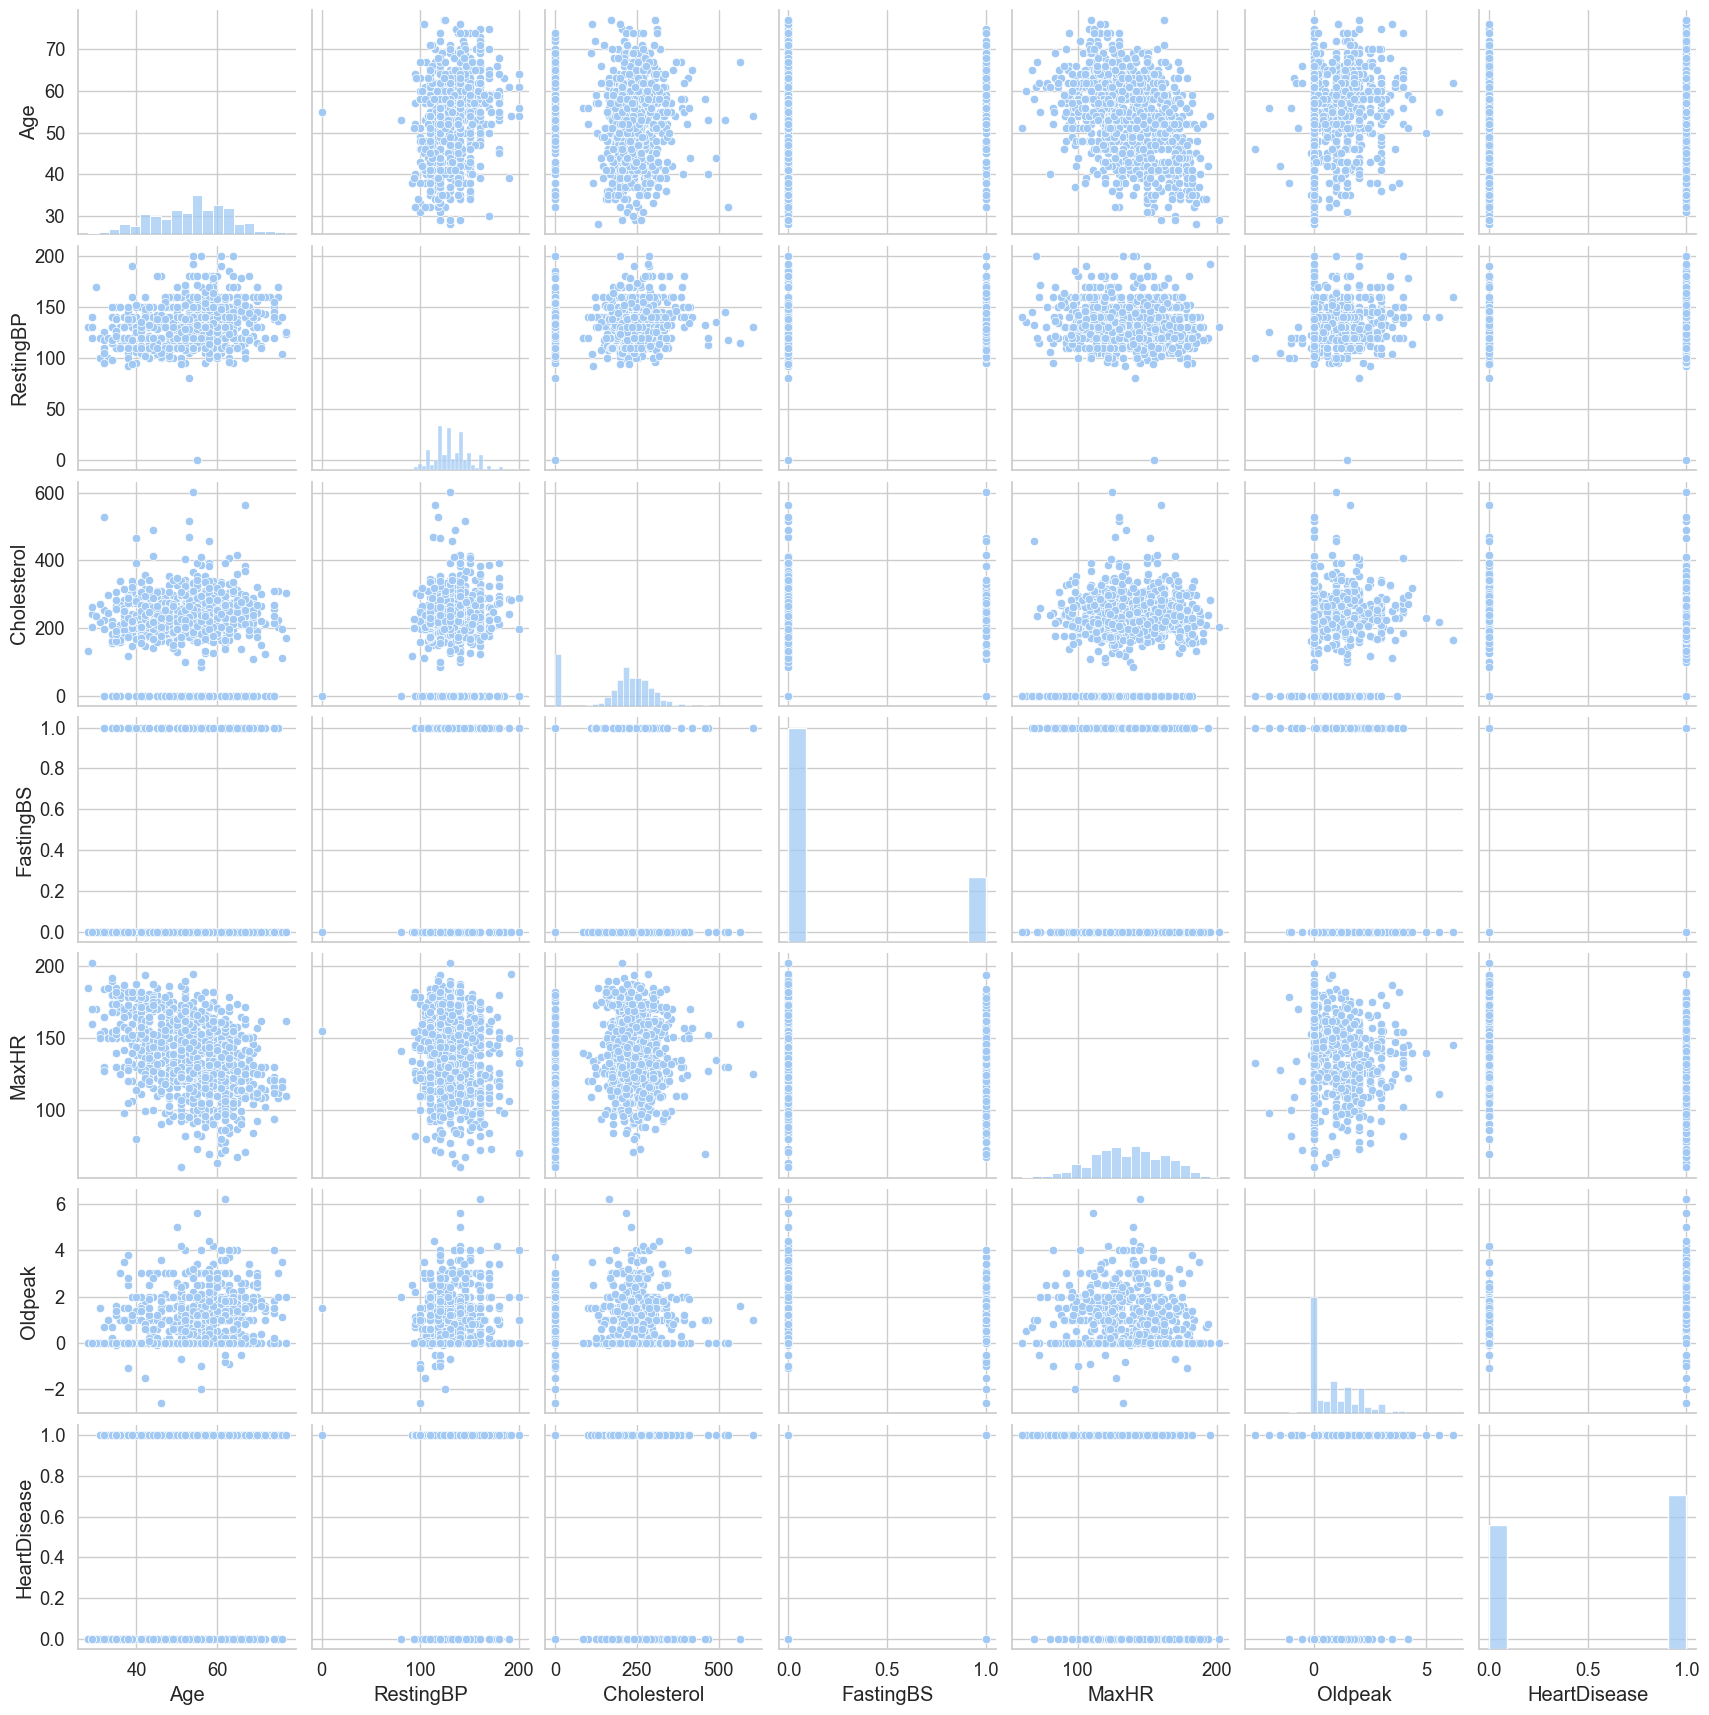

In [50]:
sns.pairplot(df)
plt.show()

### Treating and Cleaning the data

In [51]:
# Replace biologically impossible 0s with NaN so that pandas can handle them cleanly:
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

In [52]:
print("Number of people with Resting Blood Pressure <= 60:", (df["RestingBP"]<=60).sum())
print("Number of people with Cholesterol <= 50:", (df["Cholesterol"] <= 50).sum())

Number of people with Resting Blood Pressure <= 60: 0
Number of people with Cholesterol <= 50: 0


In [53]:
print("OldPeak with negative values (before): ", (df['Oldpeak'] < 0).sum())
# Doesn't seem meaningful, set them to 0 or NaN:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = 0
print("OldPeak with negative values (after): ", (df['Oldpeak'] < 0).sum())

OldPeak with negative values (before):  13
OldPeak with negative values (after):  0


In [54]:
# Ensure consistent capitalization and remove typos:
df['Sex'] = df['Sex'].str.upper().str.strip()
df['ExerciseAngina'] = df['ExerciseAngina'].str.upper().str.strip()
df['ChestPainType'] = df['ChestPainType'].str.upper().str.strip()
df['RestingECG'] = df['RestingECG'].str.title().str.strip()
df['ST_Slope'] = df['ST_Slope'].str.title().str.strip()

for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(df[col].unique())


['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'St' 'Lvh']
['N' 'Y']
['Up' 'Flat' 'Down']


**Handling Outliers**

In [55]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


Age: 0 outliers
RestingBP: 27 outliers
Cholesterol: 23 outliers
FastingBS: 214 outliers
MaxHR: 2 outliers
HeartDisease: 0 outliers


In [56]:
# Cap extreme outliers:
df[col] = np.where(df[col] < lower, lower, df[col])
df[col] = np.where(df[col] > upper, upper, df[col])


In [57]:
# Final Check
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.901307,1.045100,0.0,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [58]:
# Encoding Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_St,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0.0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1.0,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0.0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1.0,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1.0,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1.0,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1.0,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1.0,False,True,False,False,False,False,False,True,False


### Modelling

**We are going to build a pipeline of progressively stronger models.
This will help use to set a benchmark and understand tradeoffs.**

| Stage                   | Model                                                 | Why Use It                                                               |
| ----------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------ |
|  **Baseline**         | **Logistic Regression**                               | Simple, interpretable; sets a benchmark accuracy.                        |
|  **Tree-based models** | **Decision Tree / Random Forest / XGBoost**           | Handle nonlinearities, mixed data types, and interactions automatically. |
|  **Advanced models**  | **Gradient Boosting (XGBoost / LightGBM / CatBoost)** | Usually the most accurate tabular models.                                |
|  **Explainability**   | **Logistic Regression + SHAP on XGBoost**             | Understand which features drive predictions.                             |


In [59]:
# Step 1: train-test split
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
print(f"X training Shape: {X_train.shape}")
print(f"X testing Shape: {X_test.shape}")
print(f"y training Shape: {y_train.shape}")
print(f"y testing Shape: {y_test.shape}")

X training Shape: (734, 11)
X testing Shape: (184, 11)
y training Shape: (734,)
y testing Shape: (184,)


In [61]:
# Step 2: Preprocessing Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Identify columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Define transformations
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


#### Trying multiple models

In [62]:
# A. Logistic Regression (Baseline)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_lr = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        82
         1.0       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



### Model Performance Summary

| Metric                                 |        Value       |
| :------------------------------------- | :----------------: |
| **Accuracy**                           | **0.8859 (≈ 89%)** |
| **Precision (Class 1: Heart Disease)** |        0.88        |
| **Recall (Class 1)**                   |        0.92        |
| **F1-score (Class 1)**                 |        0.90        |

**Interpretation**

 - Overall Accuracy (89%) → Model predicts heart disease presence/absence correctly for nearly 9 out of 10 patients.
 - Precision (0.88) → When the model predicts Heart Disease, it’s correct 88% of the time.
 - Recall (0.92) → It successfully catches 92% of actual heart disease cases, which is good for a medical prediction model (better to catch true positives).
 - F1-score (0.90) → Balances precision and recall.


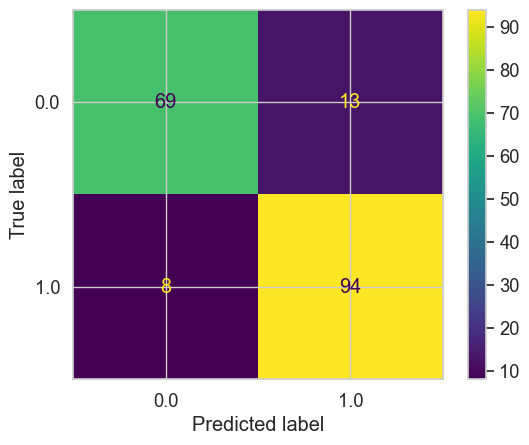

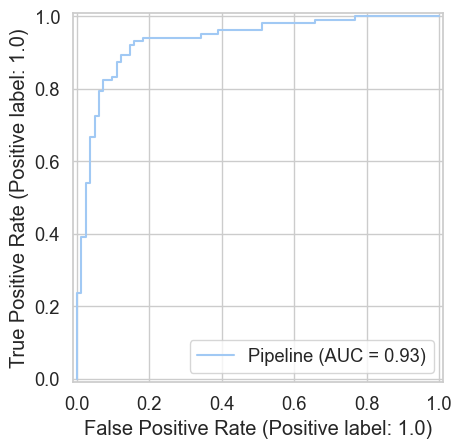

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

from sklearn.metrics import roc_auc_score, RocCurveDisplay
RocCurveDisplay.from_estimator(model_lr, X_test, y_test)

In [64]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor), 
        ('clf', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        82
         1.0       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


=== Random Forest ===
Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        82
         1.0       0.88      0.89      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


=== Gradient Boosting ===
Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        82
         1.0       0.88      0.89      0.88       102

    accuracy    

In [65]:
pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.885870
1,Random Forest,0.869565
2,Gradient Boosting,0.869565
3,SVM,0.864130
4,KNN,0.842391
5,Decision Tree,0.771739


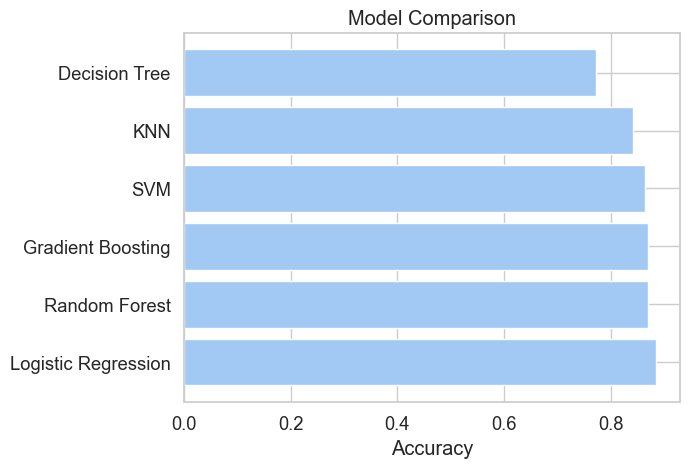

In [66]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.barh(model_names, accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

###  Model Performance Summary

| Model                   |  Accuracy | Key Notes                                         |
| :---------------------- | :-------: | :------------------------------------------------ |
| **Logistic Regression** | **0.886** | Best overall — balanced, stable, interpretable |
| **Random Forest**       |   0.870   | Strong performer, slightly below LR               |
| **Gradient Boosting**   |   0.870   | Matches RF — better for fine-tuning later         |
| **SVM**                 |   0.864   | Solid, but computationally heavier                |
| **KNN**                 |   0.842   | Weaker, likely affected by scaling & K value      |
| **Decision Tree**       |   0.772   | Overfits slightly, lowest generalization          |


**We will save our Logistic regression model.**

In [67]:
import joblib
joblib.dump(model_lr, 'models/heart_disease_model.pkl')

['models/heart_disease_model.pkl']